객체 탐지
- 한 이미지에서 객체와 그 경계 상자를 탐지
- 객체 탐지 알고리즘은 일반적으로 이미지를 입력으로 받고 경계 상자와 객체
클래스 리스트를 출력
- 경계 상자에 대해 그에 대응하는 예측 클래스와 클래스의 신뢰도를 출력

Applications
- 자율 주행 자동차에서 다른 자동차와 보행자를 찾을 때
- 의료 분야에서 방사선 사진을 사용해 종양이나 위험한 조직을 찾을 때
- 제조업에서 조립 로봇이 제품을 조립하거나 수리할 때
- 보안 산업에서 위협을 탐지하거나 사람 수를 셀 때

Bounding Box
- 이미지에서 하나의 객체 전체를 포함하는 가장 작은 직사각형

  <img src="https://miro.medium.com/max/850/1*KL6r494Eyfh3iYEXQA2tzg.png">

  <sub>[이미지 출처] https://medium.com/anolytics/how-bounding-box-annotation-helps-object-detection-in-machine-learning-use-cases-431d93e7b25b</sub>


IOU(Intersection Over Union)
- 실측값(Ground Truth) 과 모델이 예측한 값이 얼마나 겹치는지를 나타내는 지표
IOU = Area of Overlap / Area of Union  
IOU가 높을수록 잘 예측한 모델

  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width="300">
<br>
  <img src="https://pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png" width="400">

<br>

- 예시
  <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_stop_sign.jpg">

  <sub>[이미지 출처] https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/</sub>


비최댓값 억제(NMS)와 mAP(mean Average Precision)

https://bkshin.tistory.com/entry/%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%84-6-%EB%B9%84%EC%B5%9C%EB%8C%93%EA%B0%92-%EC%96%B5%EC%A0%9CNMS%EC%99%80-mAPmean-Average-Precision


비최댓값 억제의 입력값과 출력값, 절차

- 입력값(input): 예측 경계 박스들의 리스트(B), 경계 박스들의 신뢰도 점수(Confidence Score), IoU 임계값(N)
- 출력값(output): 최종 경계 박스들의 리스트(D)
- 비최댓값 억제 절차
  - B에서 신뢰도 점수가 가장 높은 경계 박스를 선택해 D에 추가합니다(D는 처음에 빈 리스트입니다). 그리고 B에서 해당 경계 박스를 제거합니다.
  - 방금 D에 추가한 경계 박스와 B에 있는 다른 모든 경계 박스를 비교해 IoU를 계산합니다. 만약 IoU가 IoU 임계값(N)보다 크면 그 경계 박스를 B에서 제거합니다(이 절차는 신뢰도 점수가 가장 높은 경계 박스와 겹치는 다른 경계 박스를 제거하는 방법입니다. 꼭 필요한 경계 박스만 남기기 위해서죠).
  - 다시 B에서 신뢰도 점수가 가장 높은 경계 박스를 선택해 D에 추가하고, 해당 경계 박스를 B에서 제거합니다.
  - 이 경계 박스와 B에 있는 다른 모든 경계 박스를 비교해 IoU를 계산하고, IoU 임계값(N)보다 큰 경계 박스들을 B에서 제거합니다.
  - 이 과정을 B에 아무것도 남지 않을 때까지 반복합니다.

이 절차를 반복하면 예측한 경계 박스 중 가장 정확한 경계 박스만 남습니다. 다시 말해, 가장 물체를 잘 나타내는 경계 박스만 남습니다. 이렇게 비최댓값 억제 기법을 사용해야 쓸데없는 경계 박스들을 없앨 수 있습니다.


NMS(Non-Maximum Suppression, 비최댓값 억제)
- 확률이 가장 높은 상자와 겹치는 상자들을 제거하는 과정
- 최댓값을 갖지 않는 상자들을 제거 과정
 - 확률 기준으로 모든 상자를 정렬하고 먼저 가장 확률이 높은 상자를 취함
 - 각 상자에 대해 다른 모든 상자와의 IOU를 계산
 - 특정 임곗값을 넘는 상자는 제거

  <img src="https://pyimagesearch.com/wp-content/uploads/2014/10/nms_fast_03.jpg">

  <sub>[이미지 출처] https://www.pyimagesearch.com/2015/02/16/faster-non-maximum-suppression-python/</sub>


## YOLO 아키텍처

- 백본 모델(backbone model) 기반
- 특징 추출기(Feature Extractor)라고도 불림
- YOLO는 자체 맞춤 아키텍쳐 사용

  <img src="https://user-images.githubusercontent.com/26322627/70716343-8e857200-1d2f-11ea-8e60-9c75f24ca9ce.png">


## YOLO Backbone

- 백본 모델(backbone model) 기반

- 특징 추출기(Feature Extractor)라고도 불림

- YOLO는 자체 맞춤 아키텍쳐 사용

- 어떤 특징 추출기 아키텍쳐를 사용했는지에 따라 성능 달라짐

  <img src="https://www.researchgate.net/publication/335865923/figure/fig1/AS:804106595758082@1568725360777/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three.jpg">

  <sub>[이미지 출처] https://www.researchgate.net/figure/Structure-detail-of-YOLOv3It-uses-Darknet-53-as-the-backbone-network-and-uses-three_fig1_335865923</sub>


## 앵커 박스(Anchor Box)

- YOLOv2에서 도입

- 사전 정의된 상자(prior box)

- 객체에 가장 근접한 앵커 박스를 맞추고 신경망을 사용해 앵커 박스의 크기를 조정하는 과정때문에 $t_x, t_y, t_w, t_h$이 필요

  <img src="https://kr.mathworks.com/help/vision/ug/ssd_detection.png">

  <sub>[이미지 출처] https://kr.mathworks.com/help/vision/ug/getting-started-with-yolo-v2.html</sub>



파이토치
- 딥러닝 프레임워크 파이토치
  - 파이토치란 데이터에 대한 딥러닝 분석을 쉽게 할 수 있도록 제공하는 오픈소스 기반 딥러닝 프레임워크이다.
  - Data Science 분야의 개발자로 프로그래밍을 하기 위해서 꼭 사용해야 하는 툴 중 하나가 딥러닝 프레임워크(Deep Learning Frameworks)인데 그중에 하나가 바로 파이토치(PyTorch)인 것이다.
  - 딥러닝 프레임워크를 툴로써 제공하기 때문에 개발자는 보다 손쉽게 프로그래밍을 할 수 있다.
  - 예를 들어 딥러닝 프레임워크는 요리사에게 재료 준비와 손질까지 된 환경을 제공해준다고 볼 수 있다.
  - 파이토치는 파이썬 기반으로 바로 사용할 수 있다는 점에서 개발 과정이 텐서플로우보다 심플하다.

- pytorch tutorials : https://tutorials.pytorch.kr/
- yolov3 pytorch 버전 : https://github.com/ultralytics/yolov3
- yolov5 : https://github.com/ultralytics/yolov5


In [1]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3/
%pip install -qr requirements.txt 

import yaml
import torch
from IPython.display import Image, clear_output 
print(f"Torch:{torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda. is_available() else 'CPU'})")

Cloning into 'yolov3'...
remote: Enumerating objects: 10007, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10007 (delta 0), reused 2 (delta 0), pack-reused 10002
Receiving objects: 100% (10007/10007), 9.33 MiB | 28.35 MiB/s, done.
Resolving deltas: 100% (6747/6747), done.
/content/yolov3
     |████████████████████████████████| 596 kB 14.6 MB/s 
     |████████████████████████████████| 1.8 MB 73.2 MB/s 
     |████████████████████████████████| 145 kB 80.8 MB/s 
     |████████████████████████████████| 181 kB 72.9 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
Torch:1.11.0+cu113 (Tesla P100-PCIE-16GB)


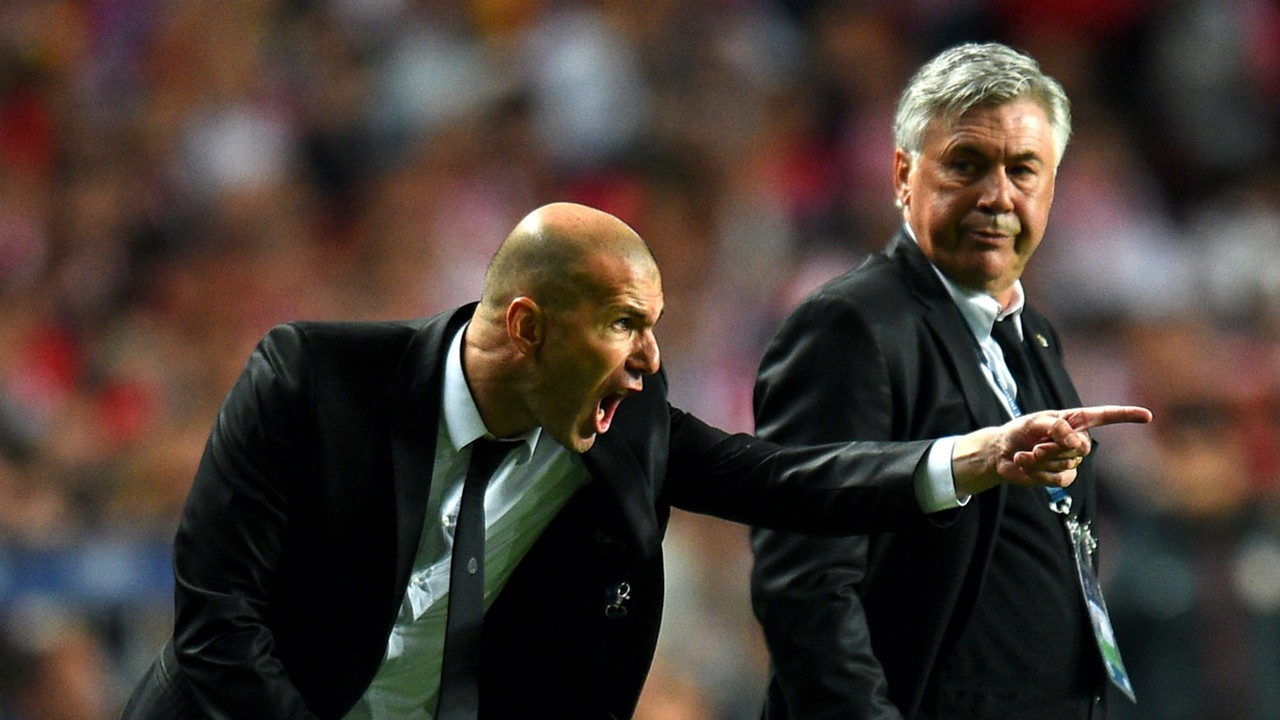

In [2]:
Image(filename='data/images/zidane.jpg',width=600)

In [3]:
!pwd

/content/yolov3


In [4]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov3.pt'], source=data/images/, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-16-gd58ba5e torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100% 119M/119M [00:08<00:00, 14.7MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (0.021s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.020s)
Speed: 0.6ms pre-process, 20.7ms inference, 22.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


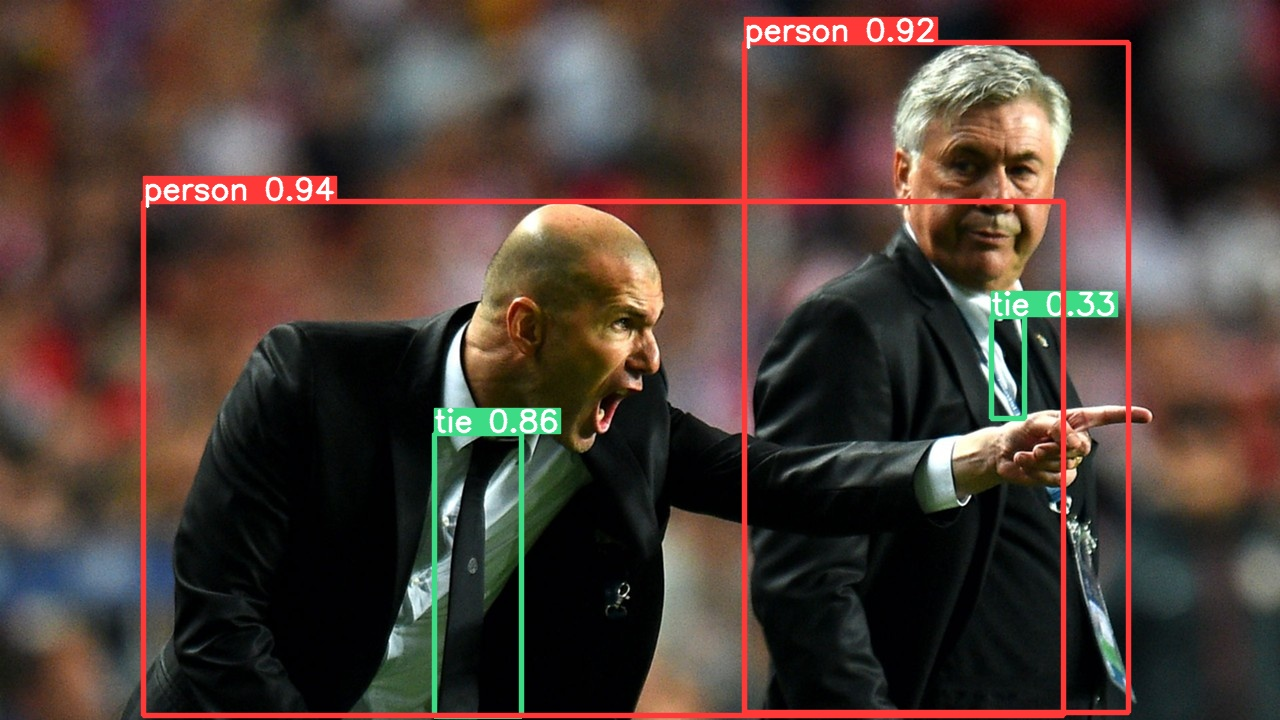

In [5]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

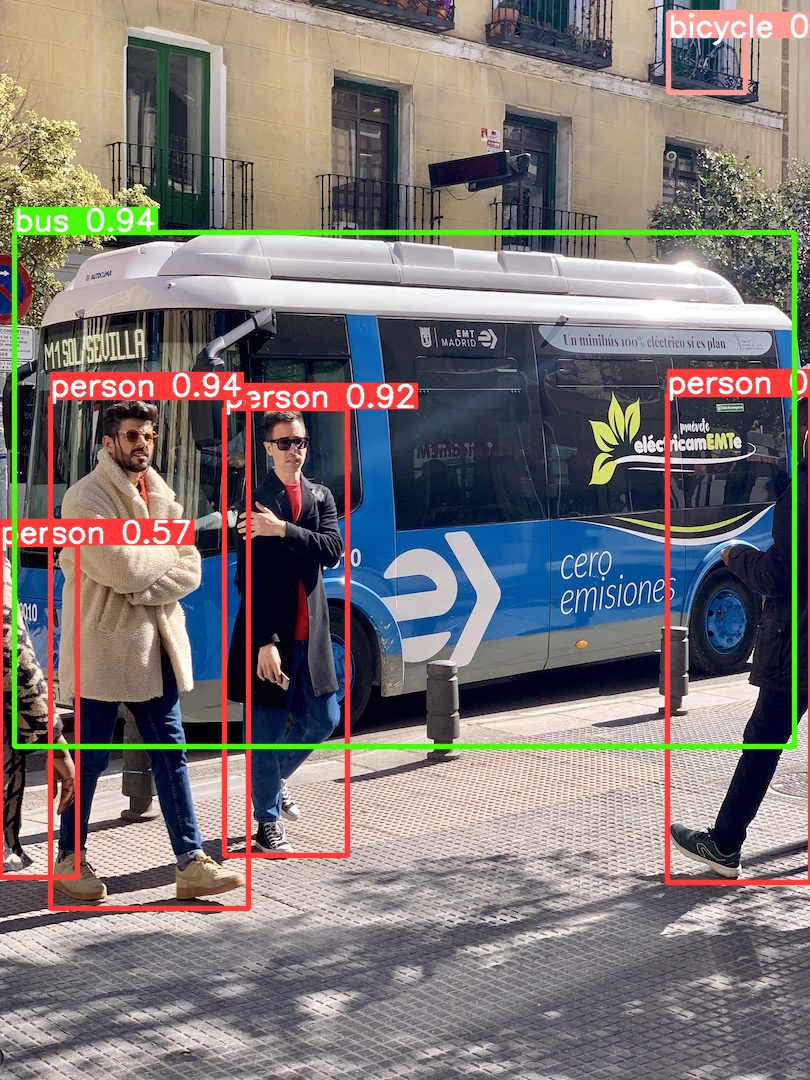

In [6]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

YOLOv5

In [7]:
%cd /content

/content


In [8]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 13410, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 13410 (delta 22), reused 33 (delta 16), pack-reused 13368
Receiving objects: 100% (13410/13410), 12.13 MiB | 21.23 MiB/s, done.
Resolving deltas: 100% (9348/9348), done.
/content/yolov5


In [9]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

100% 14.1M/14.1M [00:00<00:00, 239MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.011s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.012s)
Speed: 0.4ms pre-process, 11.4ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [10]:
!pwd

/content/yolov5


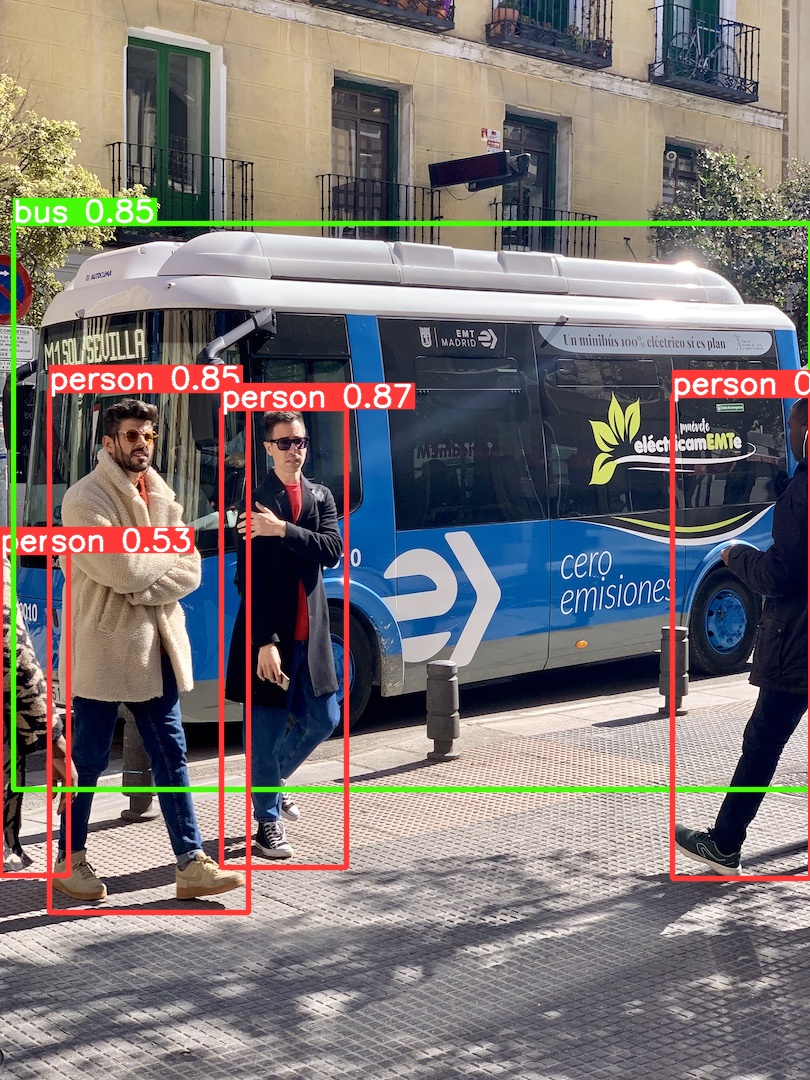

In [11]:
Image(filename='runs/detect/exp/bus.jpg',width=300)

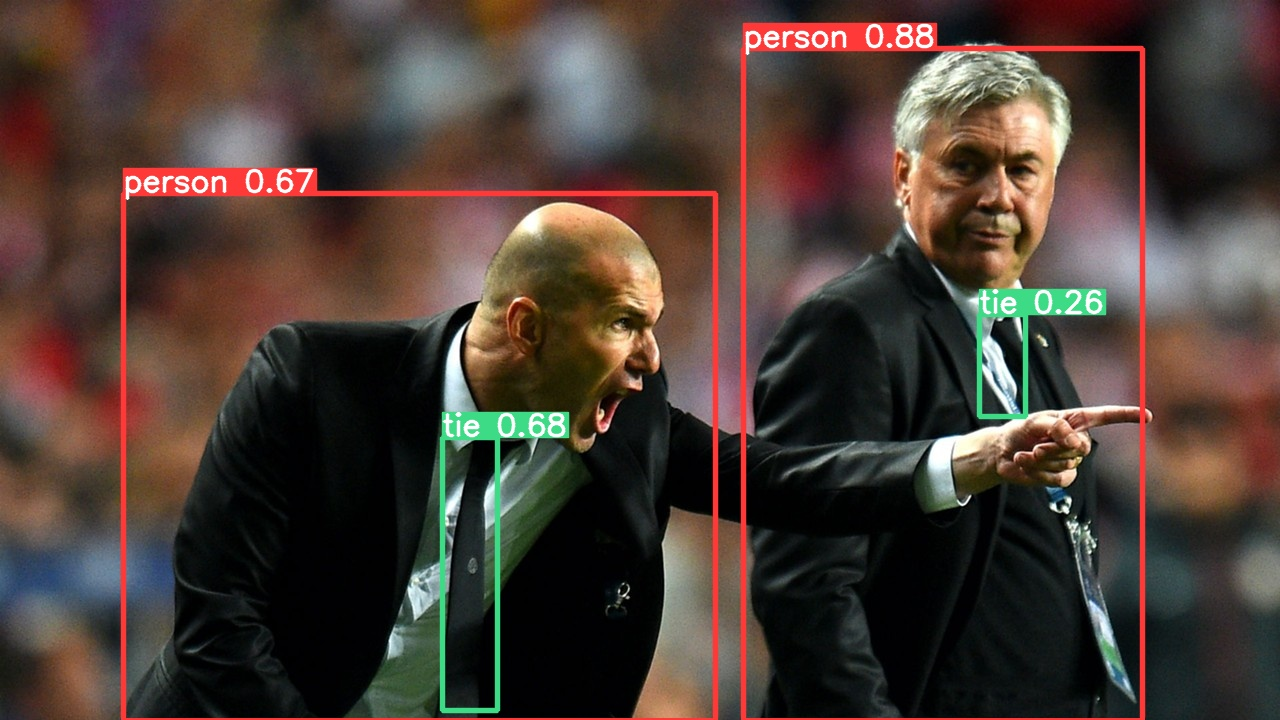

In [12]:
Image(filename='runs/detect/exp/zidane.jpg',width=300)

## 특정 목적에 맞게 훈련하여 detecting

- 포트홀 데이터셋 : https://public.roboflow.com/object-detection/pothole
- url copy : https://public.roboflow.com/ds/bYJNNdPId2?key=WsonnjVSrC


In [13]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole


/content/yolov5/pothole


In [14]:
# curl 데이터 전송 도구 . -L 옵션을 사용하여 HTTP 위치 헤더를 따르기(리다이렉션을 따르도록 curl을 사용할 수 있음)
!curl -L "https://public.roboflow.com/ds/bYJNNdPId2?key=WsonnjVSrC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1906      0 --:--:-- --:--:-- --:--:--  1902
100 46.0M  100 46.0M    0     0  43.4M      0  0:00:01  0:00:01 --:--:-- 43.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

In [15]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [16]:
from glob import glob 

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/valid/images/*.jpg')
print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 67 133


YAML은 구성 파일 작성에 자주 사용되는 데이터 직렬화 언어

In [17]:
import yaml
with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list)+'\n')

with open('/content/yolov5/pothole/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list)+'\n')

with open('/content/yolov5/pothole/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list)+'\n')

In [18]:
from IPython.core.magic import register_line_cell_magic 

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [19]:
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [20]:
%%writetemplate /content/yolov5/pothole/data.yaml
train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [21]:
%cat /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [22]:
# 모델 구성
with open('/content/yolov5/pothole/data.yaml','r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

num_classes

'1'

In [23]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [24]:
%%writetemplate /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [25]:
%cat /content/yolov5/models/yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]